In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
import collections.abc
collections.Iterable = collections.abc.Iterable
from astrodendro import Dendrogram
from astrodendro import structure
import pandas as pd

In [6]:
cgs_mp = 9.10938291e-28
cgs_me = 9.10938291e-28 
cgs_xmh =  cgs_mp + cgs_me
yHe = 9.7222222e-2 
mu = (1.e0+4.e0*yHe)*cgs_xmh


In [7]:
def get_data(filename):
  d = {}
  with h5py.File(filename, "r") as data:
    data_list = list(data)
    for ls in data_list:
      d[ls] = data[ls][()]
  return d

In [10]:
d = get_data('C:/Users/kotor/StarGen/datasets/data_ppp/cb1000.h5')

hx = d['space1']
hy = d['space2']
hz = d['space3']

nH = d['nH']
rho = nH*mu

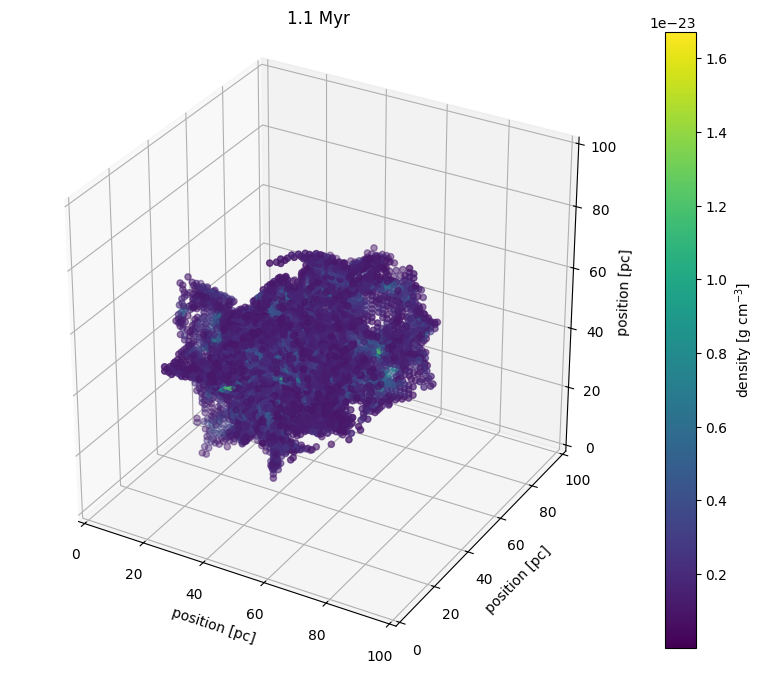

In [23]:
# make 3D map

shape = rho.shape
gas_density = rho.reshape(-1)
colormap = plt.get_cmap('viridis')
norm = plt.Normalize(gas_density.min(), gas_density.max())

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

x_coords = np.repeat(np.arange(shape[0]), shape[1]*shape[2]) * hx
y_coords = np.tile(np.repeat(np.arange(shape[1]), shape[2]), shape[0]) * hy
z_coords = np.tile(np.arange(shape[2]), shape[0]*shape[1]) * hz

threshold = 1 * 10**-24
mask= gas_density > threshold

x_filtered = x_coords[mask]
y_filtered = y_coords[mask]
z_filtered = z_coords[mask]
gas_mass_filtered = gas_density[mask]

scatter = ax.scatter(x_filtered, y_filtered, z_filtered, c=gas_mass_filtered, cmap=colormap, norm=norm)  

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('density [g cm$^{-3}$]')

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("1.1 Myr")

X = ax.set_xlabel('position [pc]')
Y = ax.set_ylabel('position [pc]')
Z = ax.set_zlabel('position [pc]')

#plt.savefig("3Dmap_400")

In [32]:
dendro = Dendrogram.compute(rho, min_value=2*10**-24, min_delta=1*10**-24, min_npix=20)

In [33]:
leaf_indices = [i for i, structure in enumerate(dendro.all_structures) if structure.is_leaf]
branch_indices = [j for j, structure in enumerate(dendro.all_structures) if structure.is_branch]

print(leaf_indices)
print(branch_indices)

[1, 3, 7, 9, 13, 14, 15, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 41, 42, 44, 45, 46]
[0, 2, 4, 5, 6, 8, 10, 11, 12, 18, 19, 24, 31, 36, 40, 43]


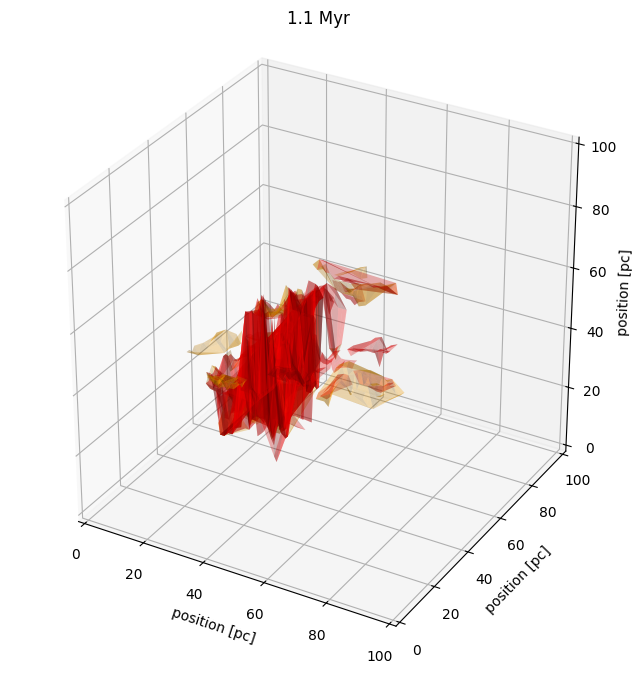

In [34]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

for i, structure_index in enumerate(leaf_indices):
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * hx, indices[1] * hy, indices[2] * hz, color='red', alpha=0.3)
    
for j, structure_index in enumerate(branch_indices):
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * hx, indices[1] * hy, indices[2] * hz, color='orange', alpha=0.3)

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("1.1 Myr")

X = ax.set_xlabel('position [pc]')
Y = ax.set_ylabel('position [pc]')
Z = ax.set_zlabel('position [pc]')

#plt.savefig("dendro3D_400_contour")

In [35]:
leaf_npix, branch_npix = [], []

for structure_index in leaf_indices:
    structure = dendro[structure_index]
    npix = structure.get_npix()
    leaf_npix.append(npix)
    
for structure_index in branch_indices:
    structure = dendro[structure_index]
    npix = structure.get_npix()
    branch_npix.append(npix)

leaf_sizes = [npix * hx * hy * hz for npix in leaf_npix]
branch_sizes = [npix * hx * hy * hz for npix in branch_npix]

print(leaf_sizes)
print(branch_sizes)

[2753.3833780616987, 2103.5000181145733, 1175.0952181901084, 2246.739615817205, 164.46027884376235, 360.75157939922065, 1026.550450202194, 68.96721370867454, 61.00945828075055, 74.27238399395719, 225.4697371245129, 190.98613027017564, 124.67150170414243, 58.35687313810922, 84.8827245645225, 63.66204342339188, 790.4703725071158, 63.66204342339188, 55.704287995467894, 103.4508205630118, 297.08953597582877, 84.8827245645225, 342.18348340073135, 79.57755427923985, 129.97667198942509, 124.67150170414243, 143.23959770263173, 82.23013942188118, 106.10340570565313, 196.2913005554583, 103.4508205630118]
[143.23959770263173, 79.57755427923985, 135.28184227470774, 68.96721370867454, 1352.8184227470774, 700.2824776573107, 265.2585142641328, 164.46027884376235, 135.28184227470774, 68.96721370867454, 389.93001596827526, 111.40857599093579, 66.3146285660332, 251.9955885509262, 58.35687313810922, 342.18348340073135]
